# Tiny ImageNet

In [1]:
from nimrod.utils import set_seed
from nimrod.models.core import lr_finder, train_one_cycle
import torch.nn as nn

from hydra.utils import instantiate
from omegaconf import OmegaConf
from rich import print

%load_ext autoreload
%autoreload 2
set_seed()


[14:40:08] INFO - PyTorch version 2.5.1 available.
Seed set to 42
Seed set to 42


## Data

In [13]:
project_name = 'Tiny-ImageNet-Classifier'

Seed set to 42
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
[14:41:57] INFO - Init ImageDataModule for zh-plus/tiny-imagenet
[14:41:59] INFO - loading dataset zh-plus/tiny-imagenet with args () from split train
[14:42:07] WARNING - split train into train/val/test with val==test [0.8, 0.2] 
[14:42:07] INFO - train: 80000 val: 20000, test: 20000
[14:42:07] INFO - split train into train/val [0.8, 0.2]


_target_: nimrod.image.datasets.ImageDataModule
name: zh-plus/tiny-imagenet
data_dir: ../data/image
exclude_grey_scale: true
train_val_split:
- 0.8
- 0.2
batch_size: 512
num_workers: 0
pin_memory: true
persistent_workers: false
transforms:
  _target_: torchvision.transforms.Compose
  transforms:
  - _target_: torchvision.transforms.ToTensor
  - _target_: torchvision.transforms.Normalize
    mean:
    - 0.4822
    - 0.4495
    - 0.3985
    std:
    - 0.2771
    - 0.269
    - 0.2826

[14:42:07] WARNING - Skipping sample at index 64602 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 87865 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 44916 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 15285 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 60013 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 72982 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 32896 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 7280 because doesn't have 3 channels
[14:42:07] WARNING - Skipping sample at index 94254 because doesn't have 3 channels


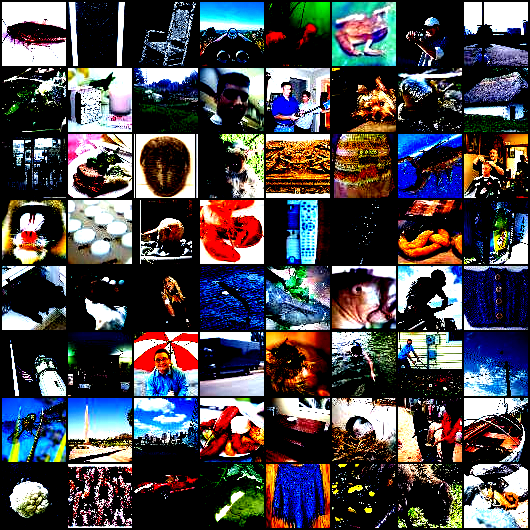

In [4]:
cfg = OmegaConf.load('../config/data/image/tiny_imagenet.yaml')
cfg.data_dir = "../data/image"
cfg.batch_size = 512
cfg.num_workers = 0
dm = instantiate(cfg)
dm.prepare_data()
dm.setup()
print(OmegaConf.to_yaml(cfg))
xb, yb = next(iter(dm.train_dataloader()))

dm.show_batch(xb[:64])



In [8]:
print(f"image size: {dm.dim}, num_classes: {dm.num_classes}")

image size: [64, 64], num_classes: 200

## MLP

1024

[17:18:58] INFO - MLP: init
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[17:18:58] INFO - MLP_X init
[17:18:58] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[17:19:01] INFO - loading dataset fashion_mnist with args () from split train
[17:19:08] INFO - loading dataset fashion_mnist with args () from split test
[17:19:11] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[17:19:11] WARNING - no scheduler has been setup
/Users/slegroux/minifor

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 90 steps due to diverging loss.
Learning rate set to 0.001778279410038923
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_a0d8030e-f0ea-4aae-b869-6c4bf8fe730e.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_a0d8030e-f0ea-4aae-b869-6c4bf8fe730e.ckpt


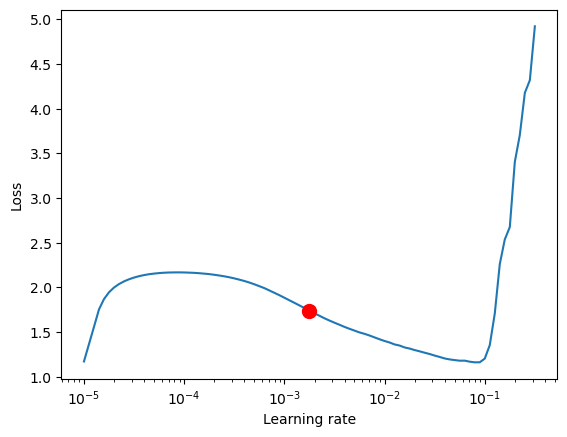

Suggested learning rate: 0.001778279410038923

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[17:19:16] INFO - MLP_X init
[17:19:16] INFO - Classifier: init
wandb: Currently logged in as: slegroux. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


[17:19:19] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[17:19:19] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | MLP                | 264 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
264 K     Trainable params
0         Non-trainable params
264 K     Total params
1.060     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │     0.861299991607666     │
│         test/loss         │    0.3925398588180542     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆███████████
lr-AdamW,▁▂▂▃▃▆▇▇████████▇▇▇▇▇▇▆▆▆▄▄▄▃▃▃▂▁▁▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▇▇██
train/acc_step,▁▂▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████▇████████▇████
train/loss_epoch,█▂▁▁▁
train/loss_step,██▆▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇██
val/acc,▁▅▇██
val/acc_best,▁▅▇██


In [3]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/mlpx.yaml')
cfg_model.nnet.n_in = dm.dim[0] * dm.dim[1]
print(cfg_model.nnet.n_in)
cfg_model.nnet.n_h = 256
cfg_model.nnet.dropout = 0.1
model = instantiate(cfg_model) #partial

tags = [f"n_h:{cfg_model.nnet.n_h}", f"dropout:{cfg_model.nnet.dropout}",f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    model_summary=False,
    logger=exp_logger
    )

## ConvNet

Seed set to 42
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:23:13] INFO - ConvNetX: init
[15:23:13] INFO - Classifier: init
[15:23:16] INFO - loading dataset zh-plus/tiny-imagenet with args () from split train
[15:23:23] WARNING - split train into train/val/test with val==test [0.8, 0.2] 
[15:23:23] INFO - train: 80000 val: 20000, test: 20000
[15:23:23] INFO - split train into train/val [0.8, 0.2]
[15:23:24] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[15:23:24] WARNING - no scheduler has been setup
[15:23:24] WARNING - Skipping sample at index 79968 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 63629 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 54902 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 29724 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 55939 because doesn't have 3 ch

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

[15:23:24] WARNING - Skipping sample at index 30437 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 42098 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 81479 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 81356 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 81670 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 63811 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 44332 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 83399 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 17995 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 94315 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 66675 because doesn't have 3 channels
[15:23:24] WARNING - Skipping sample at index 50776 because doesn't have 3 c

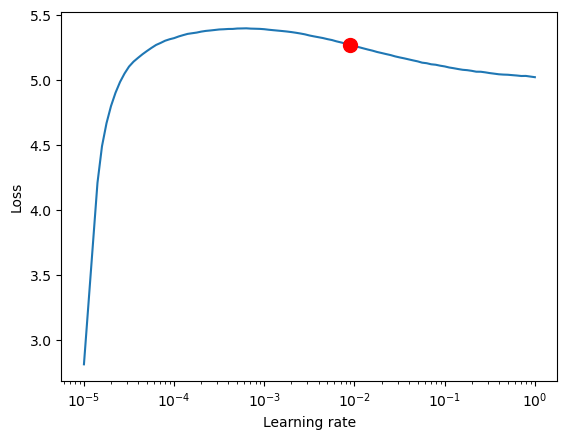

Suggested learning rate: 0.008912509381337452

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:23:38] INFO - ConvNetX: init
[15:23:38] INFO - Classifier: init
[15:23:38] WARNING - Skipping sample at index 79968 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 63629 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 54902 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 29724 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 55939 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 37292 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 29542 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 94699 because doesn't have 3 channels
[15:23:38] WARNING - Skipping sample at index 3416 because doesn't have 3 channels
[15:23:39] WARNING - Skipping sample at index 75871 because do

==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
ConvNet                                  [512, 200]                --
├─Sequential: 1-1                        [512, 200]                --
│    └─ConvLayer: 2-1                    [512, 8, 64, 64]          --
│    │    └─Sequential: 3-1              [512, 8, 64, 64]          --
│    │    │    └─Conv2d: 4-1             [512, 8, 64, 64]          216
│    │    │    └─BatchNorm2d: 4-2        [512, 8, 64, 64]          16
│    │    │    └─ReLU: 4-3               [512, 8, 64, 64]          --
│    └─ConvLayer: 2-2                    [512, 16, 32, 32]         --
│    │    └─Sequential: 3-2              [512, 16, 32, 32]         --
│    │    │    └─Conv2d: 4-4             [512, 16, 32, 32]         1,152
│    │    │    └─BatchNorm2d: 4-5        [512, 16, 32, 32]         32
│    │    │    └─ReLU: 4-6               [512, 16, 32, 32]         --
│    └─ConvLayer: 2-3                    [512, 32, 16, 16]         --
│    │    └─Sequential: 3-3              [512, 32, 16, 16]         --
│    │    │    └─Conv2d: 4-7             [512, 32, 16, 16]         4,608
│    │    │    └─BatchNorm2d: 4-8        [512, 32, 16, 16]         64
│    │    │    └─ReLU: 4-9               [512, 32, 16, 16]         --
│    └─ConvLayer: 2-4                    [512, 64, 8, 8]           --
│    │    └─Sequential: 3-4              [512, 64, 8, 8]           --
│    │    │    └─Conv2d: 4-10            [512, 64, 8, 8]           18,432
│    │    │    └─BatchNorm2d: 4-11       [512, 64, 8, 8]           128
│    │    │    └─ReLU: 4-12              [512, 64, 8, 8]           --
│    └─ConvLayer: 2-5                    [512, 128, 4, 4]          --
│    │    └─Sequential: 3-5              [512, 128, 4, 4]          --
│    │    │    └─Conv2d: 4-13            [512, 128, 4, 4]          73,728
│    │    │    └─BatchNorm2d: 4-14       [512, 128, 4, 4]          256
│    │    │    └─ReLU: 4-15              [512, 128, 4, 4]          --
│    └─ConvLayer: 2-6                    [512, 64, 2, 2]           --
│    │    └─Sequential: 3-6              [512, 64, 2, 2]           --
│    │    │    └─Conv2d: 4-16            [512, 64, 2, 2]           73,728
│    │    │    └─BatchNorm2d: 4-17       [512, 64, 2, 2]           128
│    │    │    └─ReLU: 4-18              [512, 64, 2, 2]           --
│    └─ConvLayer: 2-7                    [512, 200, 1, 1]          --
│    │    └─Sequential: 3-7              [512, 200, 1, 1]          --
│    │    │    └─Conv2d: 4-19            [512, 200, 1, 1]          115,200
│    │    │    └─BatchNorm2d: 4-20       [512, 200, 1, 1]          400
│    │    │    └─ReLU: 4-21              [512, 200, 1, 1]          --
│    └─Flatten: 2-8                      [512, 200]                --
==========================================================================================
Total params: 288,088
Trainable params: 288,088
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 3.08
==========================================================================================
Input size (MB): 25.17
Forward/backward pass size (MB): 523.83
Params size (MB): 1.15
Estimated Total Size (MB): 550.15
==========================================================================================

wandb: Currently logged in as: slegroux. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


[15:23:44] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[15:23:44] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ConvNet            | 288 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
288 K     Trainable params
0         Non-trainable params
288 K     Total params
1.152     Total estimated model params size (MB)
46        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
[15:23:44] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[

Training: |          | 0/? [00:00<?, ?it/s]

[15:23:44] WARNING - Skipping sample at index 76695 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 70576 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 11829 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 76665 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 47006 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 74345 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 15810 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 85405 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 62734 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 59075 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 58125 because doesn't have 3 channels
[15:23:44] WARNING - Skipping sample at index 40246 because doesn't have 3 c

Validation: |          | 0/? [00:00<?, ?it/s]

[15:24:11] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 33223 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 85868 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 85869 because doesn't have 3 channels
[15:24:11] WARNING - Skipping sample at index 30933 because doesn't have 3 ch

Validation: |          | 0/? [00:00<?, ?it/s]

[15:24:40] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 33223 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 85868 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 85869 because doesn't have 3 channels
[15:24:40] WARNING - Skipping sample at index 30933 because doesn't have 3 ch

Validation: |          | 0/? [00:00<?, ?it/s]

[15:25:09] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 33223 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 85868 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 85869 because doesn't have 3 channels
[15:25:09] WARNING - Skipping sample at index 30933 because doesn't have 3 ch

Validation: |          | 0/? [00:00<?, ?it/s]

[15:25:38] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 33223 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 85868 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 85869 because doesn't have 3 channels
[15:25:38] WARNING - Skipping sample at index 30933 because doesn't have 3 ch

Validation: |          | 0/? [00:00<?, ?it/s]

[15:26:08] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 33223 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 85868 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 85869 because doesn't have 3 channels
[15:26:09] WARNING - Skipping sample at index 30933 because doesn't have 3 ch

Testing: |          | 0/? [00:00<?, ?it/s]

[15:26:13] WARNING - Skipping sample at index 76612 because doesn't have 3 channels
[15:26:13] WARNING - Skipping sample at index 2683 because doesn't have 3 channels
[15:26:13] WARNING - Skipping sample at index 48577 because doesn't have 3 channels
[15:26:13] WARNING - Skipping sample at index 35634 because doesn't have 3 channels
[15:26:13] WARNING - Skipping sample at index 29851 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 21572 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 60362 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 13521 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 33223 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 85868 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 85869 because doesn't have 3 channels
[15:26:14] WARNING - Skipping sample at index 30933 because doesn't have 3 ch

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.2738499939441681     │
│         test/loss         │     3.285547971725464     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▆▆▆▆▆▆▆█████████
lr-AdamW,▁▂▃▃▄▇▇▇█████▇▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▃▅▇█
train/acc_step,▁▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▅▄▆▆▆▆▆▆▅▆▆▆▆▇▇▇███▇▇
train/loss_epoch,█▅▃▂▁
train/loss_step,██▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▁▁▁▂▁
trainer/global_step,▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇████
val/acc,▁▄▆██
val/acc_best,▁▄▆██


In [12]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 8, 16, 32, 64, 128]
# feats_dim = [3, 8, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
cfg_model.num_classes = dm.num_classes
model = instantiate(cfg_model) #partial

tags = [
    f"n_features:{feats_dim}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}",
    ]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger=exp_logger
    )

## ResNet

[15:33:45] INFO - ResNet: init
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:33:45] INFO - ResNetX: init
[15:33:45] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:45: Attribute 'nnet' removed from hparams because it cannot be pickled. You can suppress this warning by setting `self.save_hyperparameters(ignore=['nnet'])`.
[15:33:48] INFO - 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

[15:34:01] WARNING - Skipping sample at index 32831 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 49391 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 48875 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 60342 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 62596 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 60585 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 51731 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 57793 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 78400 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 72783 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 29294 because doesn't have 3 channels
[15:34:01] WARNING - Skipping sample at index 71744 because doesn't have 3 c

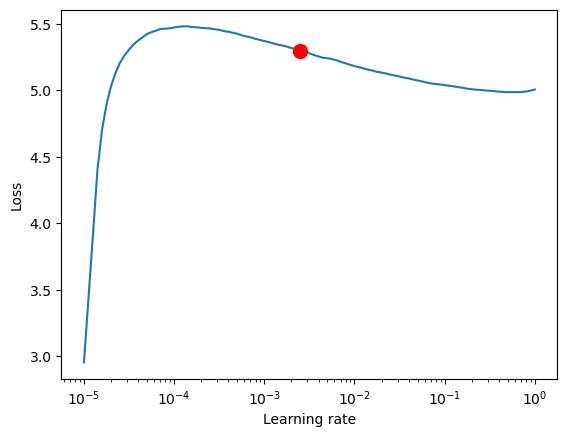

Suggested learning rate: 0.0025118864315095794

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:34:35] INFO - ResNetX: init
[15:34:35] INFO - Classifier: init
[15:34:35] WARNING - Skipping sample at index 29733 because doesn't have 3 channels
[15:34:35] WARNING - Skipping sample at index 44423 because doesn't have 3 channels
[15:34:35] WARNING - Skipping sample at index 38694 because doesn't have 3 channels
[15:34:35] WARNING - Skipping sample at index 63062 because doesn't have 3 channels
[15:34:35] WARNING - Skipping sample at index 65550 because doesn't have 3 channels
[15:34:35] WARNING - Skipping sample at index 13512 because doesn't have 3 channels
[15:34:35] WARNING - Skipping sample at index 42302 because doesn't have 3 channels


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 200]                --
├─Sequential: 1-1                                  [512, 200]                --
│    └─ResBlock: 2-1                               [512, 16, 64, 64]         --
│    │    └─Sequential: 3-1                        [512, 16, 64, 64]         --
│    │    │    └─ConvLayer: 4-1                    [512, 16, 64, 64]         --
│    │    │    │    └─Sequential: 5-1              [512, 16, 64, 64]         464
│    │    │    └─ConvLayer: 4-2                    [512, 16, 64, 64]         --
│    │    │    │    └─Sequential: 5-2              [512, 16, 64, 64]         2,336
│    │    └─Identity: 3-2                          [512, 3, 64, 64]          --
│    │    └─ConvLayer: 3-3                         [512, 16, 64, 64]         --
│    │    │    └─Sequential: 4-3                   [512, 16, 64, 64]         --
│    │    │    │    └─Conv2d: 5-3                  [512, 16, 64, 64]         48
│    │    │    │    └─BatchNorm2d: 5-4             [512, 16, 64, 64]         32
│    └─ResBlock: 2-2                               [512, 32, 32, 32]         --
│    │    └─Sequential: 3-4                        [512, 32, 32, 32]         --
│    │    │    └─ConvLayer: 4-4                    [512, 32, 32, 32]         --
│    │    │    │    └─Sequential: 5-5              [512, 32, 32, 32]         4,672
│    │    │    └─ConvLayer: 4-5                    [512, 32, 32, 32]         --
│    │    │    │    └─Sequential: 5-6              [512, 32, 32, 32]         9,280
│    │    └─AvgPool2d: 3-5                         [512, 16, 32, 32]         --
│    │    └─ConvLayer: 3-6                         [512, 32, 32, 32]         --
│    │    │    └─Sequential: 4-6                   [512, 32, 32, 32]         --
│    │    │    │    └─Conv2d: 5-7                  [512, 32, 32, 32]         512
│    │    │    │    └─BatchNorm2d: 5-8             [512, 32, 32, 32]         64
│    └─ResBlock: 2-3                               [512, 64, 16, 16]         --
│    │    └─Sequential: 3-7                        [512, 64, 16, 16]         --
│    │    │    └─ConvLayer: 4-7                    [512, 64, 16, 16]         --
│    │    │    │    └─Sequential: 5-9              [512, 64, 16, 16]         18,560
│    │    │    └─ConvLayer: 4-8                    [512, 64, 16, 16]         --
│    │    │    │    └─Sequential: 5-10             [512, 64, 16, 16]         36,992
│    │    └─AvgPool2d: 3-8                         [512, 32, 16, 16]         --
│    │    └─ConvLayer: 3-9                         [512, 64, 16, 16]         --
│    │    │    └─Sequential: 4-9                   [512, 64, 16, 16]         --
│    │    │    │    └─Conv2d: 5-11                 [512, 64, 16, 16]         2,048
│    │    │    │    └─BatchNorm2d: 5-12            [512, 64, 16, 16]         128
│    └─ResBlock: 2-4                               [512, 128, 8, 8]          --
│    │    └─Sequential: 3-10                       [512, 128, 8, 8]          --
│    │    │    └─ConvLayer: 4-10                   [512, 128, 8, 8]          --
│    │    │    │    └─Sequential: 5-13             [512, 128, 8, 8]          73,984
│    │    │    └─ConvLayer: 4-11                   [512, 128, 8, 8]          --
│    │    │    │    └─Sequential: 5-14             [512, 128, 8, 8]          147,712
│    │    └─AvgPool2d: 3-11                        [512, 64, 8, 8]           --
│    │    └─ConvLayer: 3-12                        [512, 128, 8, 8]          --
│    │    │    └─Sequential: 4-12                  [512, 128, 8, 8]          --
│    │    │    │    └─Conv2d: 5-15                 [512, 128, 8, 8]          8,192
│    │    │    │    └─BatchNorm2d: 5-16            [512, 128, 8, 8]          2

[15:34:38] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[15:34:38] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 2.3 M  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
2.3 M     Trainable params
0         Non-trainable params
2.3 M     Total params
9.270     Total estimated model params size (MB)
123       Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
[15:34:38] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:34:38] WARNING - Skipping sample at index 58177 because doesn't have 3 channels


Training: |          | 0/? [00:00<?, ?it/s]

[15:34:39] WARNING - Skipping sample at index 40460 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 71750 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 4446 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 13837 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 49141 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 97121 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 83393 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 77264 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 83489 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 57738 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 58354 because doesn't have 3 channels
[15:34:39] WARNING - Skipping sample at index 55650 because doesn't have 3 ch

Validation: |          | 0/? [00:00<?, ?it/s]

[15:35:34] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 58177 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 47175 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 55390 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 55813 because doesn't have 3 channels
[15:35:34] WARNING - Skipping sample at index 98562 because doesn't have 3 c

Validation: |          | 0/? [00:00<?, ?it/s]

[15:36:35] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 58177 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 47175 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 55390 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 55813 because doesn't have 3 channels
[15:36:35] WARNING - Skipping sample at index 98562 because doesn't have 3 c

Validation: |          | 0/? [00:00<?, ?it/s]

[15:37:34] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 58177 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 47175 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 55390 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 55813 because doesn't have 3 channels
[15:37:34] WARNING - Skipping sample at index 98562 because doesn't have 3 c

Validation: |          | 0/? [00:00<?, ?it/s]

[15:38:33] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 58177 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 47175 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 55390 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 55813 because doesn't have 3 channels
[15:38:33] WARNING - Skipping sample at index 98562 because doesn't have 3 c

Validation: |          | 0/? [00:00<?, ?it/s]

[15:39:32] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 58177 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 47175 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 55390 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 55813 because doesn't have 3 channels
[15:39:32] WARNING - Skipping sample at index 98562 because doesn't have 3 c

Testing: |          | 0/? [00:00<?, ?it/s]

[15:39:38] WARNING - Skipping sample at index 71577 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 35668 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 51163 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 29919 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 60468 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 61251 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 32769 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 58177 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 47175 because doesn't have 3 channels
[15:39:38] WARNING - Skipping sample at index 55390 because doesn't have 3 channels
[15:39:39] WARNING - Skipping sample at index 55813 because doesn't have 3 channels
[15:39:39] WARNING - Skipping sample at index 98562 because doesn't have 3 c

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.37380000948905945    │
│         test/loss         │     2.710066795349121     │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆██
lr-AdamW,▁▁▂▂▂▄▄▄▄▅▇███████▇▇▇▆▆▆▆▆▅▅▅▃▂▂▂▂▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▃▅▆█
train/acc_step,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▅▅▅▄▅▅▅▅▅▆▆▆▆▇█▇▇█▇▇▇█▇
train/loss_epoch,█▅▄▂▁
train/loss_step,█▇▇▇▇▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▇▇▇▇▇███
val/acc,▁▃▆▇█
val/acc_best,▁▃▆▇█


In [14]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

# exp_logger = 'tensorboard'
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
cfg_model.num_classes=dm.num_classes
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
# feats_dim = [3, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger=exp_logger
    )